Final model selection. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os 

# loading linear algorithms
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

# tree based algorithms
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, r2_score, mean_absolute_error

In [2]:
 # pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
df = pd.read_csv('training_housing.csv')
df.head(10)

,Address,Subdivision Name,City,Cumulative Days On Market,Days On Market,SqFt,Fireplaces Total,Heating,Year Built,Utilities,Longitude,Latitude,HOA Fee,HOA Fee Frequency,HOA Type,Cooling,County,Covered Spaces,Carport Spaces,Close Date,Close Price,Bath Full,Baths Half,Baths Total,# Dining Areas,# Living Areas,Beds Total,Bath Total,Acres,Current Price
0,2026 Oldfield Drive,Eastcrest Park,Dallas,3,3,"1,515",0,Central,1958,"City Sewer, City Water",-96.698067,32.747027,NaN,NaN,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/28/2022,"$274,900",2,0,2/0,1,1,3,2,0.169,"$274,900"
1,12136 Madeleine Circle,Dallas Project No 1 East,Dallas,3,3,"3,335",2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96.795085,32.915152,NaN,NaN,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0.0,05/03/2022,"$1,206,000",3,1,3/1,2,2,3,4,0.248,"$1,206,000"
2,6215 Suffolk Drive,Redstone Add,Arlington,4,4,"1,860",1,Central,1987,"Asphalt, City Sewer, City Water",-97.162538,32.644153,NaN,NaN,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/23/2022,"$355,000",2,0,2/0,2,1,3,2,0.186,"$355,000"
3,2807 Jeremy Drive,Creek Crossing Estates,Mesquite,7,7,"3,039",1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96.560757,32.742026,NaN,NaN,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/25/2022,"$457,500",3,0,3/0,1,1,5,3,0.326,"$457,500"
4,9701 Lancelot Circle,Heritage Oaks Sec 1 & 2 Add,Fort Worth,3,3,"1,886",1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97.240889,32.604638,NaN,NaN,None,"Central Air, Electric",Tarrant,2,0.0,05/06/2022,"$460,000",2,1,2/1,1,1,3,3,0.664,"$460,000"
5,913 Lake View Ridge,Meadow Park Add,White Settlement,4,4,"2,288",1,Natural Gas,1964,"Asphalt, City Water, Septic",-97.465549,32.748759,NaN,NaN,None,Central Air,Tarrant,2,0.0,05/13/2022,"$263,000",2,0,2/0,1,2,3,2,0.600,"$263,000"
6,6637 Ridgetop Drive,Summer Hills Add,Watauga,4,4,"1,601",1,"Central, Fireplace(s), Natural Gas",1991,"City Sewer, City Water, Concrete, Curbs, Sidewalk",-97.239987,32.878464,NaN,NaN,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/16/2022,"$352,000",2,0,2/0,1,1,3,2,0.152,"$352,000"
7,7205 Autumn Moon Drive,Autumn Meadows Add,Forest Hill,3,3,"1,620",0,Electric,1999,"City Sewer, City Water",-97.280574,32.650933,NaN,NaN,None,Electric,Tarrant,0,0.0,04/26/2022,"$247,500",2,0,2/0,1,2,4,2,0.130,"$247,500"
8,3117 Phoenix Drive,Western Hills Add,Fort Worth,6,6,"1,854",1,Natural Gas,1956,"City Sewer, City Water, Concrete, Curbs, Individual Gas Meter, Individual Water Meter",-97.457980,32.727963,NaN,NaN,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,3,1.0,04/22/2022,"$285,000",2,0,2/0,2,2,3,2,0.269,"$285,000"
9,1134 Bellaire Drive,Bellaire Add,Grapevine,1,1,"1,350",0,"Central, Natural Gas",1953,"Cable Available, City Sewer, City Water, Concrete, Curbs, Electricity Connected, Individual Gas Meter, Individual Water Meter, Overhead Utilities",-97.081813,32.929160,NaN,NaN,None,Electric,Tarrant,0,0.0,04/25/2022,"$360,000",2,0,2/0,1,1,3,2,0.214,"$360,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Address                    4000 non-null   object 
 1   Subdivision Name           3988 non-null   object 
 2   City                       4000 non-null   object 
 3   Cumulative Days On Market  4000 non-null   int64  
 4   Days On Market             4000 non-null   int64  
 5   SqFt                       3999 non-null   object 
 6   Fireplaces Total           4000 non-null   int64  
 7   Heating                    3999 non-null   object 
 8   Year Built                 4000 non-null   int64  
 9   Utilities                  3999 non-null   object 
 10  Longitude                  4000 non-null   float64
 11  Latitude                   4000 non-null   float64
 12  HOA Fee                    1808 non-null   object 
 13  HOA Fee Frequency          1815 non-null   objec

In [5]:
df.columns

Index(['Address', 'Subdivision Name', 'City', 'Cumulative Days On Market',
       'Days On Market', 'SqFt', 'Fireplaces Total', 'Heating', 'Year Built',
       'Utilities', 'Longitude', 'Latitude', 'HOA Fee', 'HOA Fee Frequency',
       'HOA Type', 'Cooling', 'County', 'Covered Spaces', 'Carport Spaces',
       'Close Date', 'Close Price', 'Bath Full', 'Baths Half', 'Baths Total',
       '# Dining Areas', '# Living Areas', 'Beds Total', 'Bath Total', 'Acres',
       'Current Price'],
      dtype='object')

In [6]:
#Chose to drop this information because it is duplicated in the bath total column. Dropped HOA information due to null amounts.
df.drop(["HOA Fee", "HOA Fee Frequency", "Bath Full", "Baths Half", "Baths Total"], axis=1, inplace=True)
df.columns

Index(['Address', 'Subdivision Name', 'City', 'Cumulative Days On Market',
       'Days On Market', 'SqFt', 'Fireplaces Total', 'Heating', 'Year Built',
       'Utilities', 'Longitude', 'Latitude', 'HOA Type', 'Cooling', 'County',
       'Covered Spaces', 'Carport Spaces', 'Close Date', 'Close Price',
       '# Dining Areas', '# Living Areas', 'Beds Total', 'Bath Total', 'Acres',
       'Current Price'],
      dtype='object')

In [7]:
df.columns = ['address', 'subdivision_name', 'city', 'cumm_days_on_market', 'days_on_market', 'sqft', 'fireplaces_total', 'heating', 'year_built', 'utilities', 'longitude', 'latitude', 'hoa_type', 'cooling', 'county', 'covered_spaces', 'carport_spaces', 'close_date', 'close_price', 'dining_area_#', 'living_area_#', 'beds_total', 'bath_total', 'acres', 'current_price']
df.head()

,address,subdivision_name,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,2026 Oldfield Drive,Eastcrest Park,Dallas,3,3,"1,515",0,Central,1958,"City Sewer, City Water",-96.698067,32.747027,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/28/2022,"$274,900",1,1,3,2,0.169,"$274,900"
1,12136 Madeleine Circle,Dallas Project No 1 East,Dallas,3,3,"3,335",2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96.795085,32.915152,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0.0,05/03/2022,"$1,206,000",2,2,3,4,0.248,"$1,206,000"
2,6215 Suffolk Drive,Redstone Add,Arlington,4,4,"1,860",1,Central,1987,"Asphalt, City Sewer, City Water",-97.162538,32.644153,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/23/2022,"$355,000",2,1,3,2,0.186,"$355,000"
3,2807 Jeremy Drive,Creek Crossing Estates,Mesquite,7,7,"3,039",1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96.560757,32.742026,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/25/2022,"$457,500",1,1,5,3,0.326,"$457,500"
4,9701 Lancelot Circle,Heritage Oaks Sec 1 & 2 Add,Fort Worth,3,3,"1,886",1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97.240889,32.604638,None,"Central Air, Electric",Tarrant,2,0.0,05/06/2022,"$460,000",1,1,3,3,0.664,"$460,000"


In [8]:
#Correlations
corrMatrix = df.corr()
print (corrMatrix)

                     cumm_days_on_market  days_on_market  fireplaces_total  \
cumm_days_on_market             1.000000        0.463385         -0.051008   
days_on_market                  0.463385        1.000000         -0.018457   
fireplaces_total               -0.051008       -0.018457          1.000000   
year_built                      0.015203        0.005768          0.000575   
longitude                      -0.000649       -0.001130          0.001237   
latitude                        0.000187        0.008469          0.005907   
covered_spaces                 -0.012455       -0.021807          0.355102   
carport_spaces                  0.000048        0.028337         -0.015208   
dining_area_#                  -0.102216       -0.034670          0.377415   
living_area_#                  -0.000939       -0.006543          0.396665   
beds_total                      0.035006        0.015983          0.296548   
bath_total                      0.013441       -0.002198        

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              4000 non-null   object 
 1   subdivision_name     3988 non-null   object 
 2   city                 4000 non-null   object 
 3   cumm_days_on_market  4000 non-null   int64  
 4   days_on_market       4000 non-null   int64  
 5   sqft                 3999 non-null   object 
 6   fireplaces_total     4000 non-null   int64  
 7   heating              3999 non-null   object 
 8   year_built           4000 non-null   int64  
 9   utilities            3999 non-null   object 
 10  longitude            4000 non-null   float64
 11  latitude             4000 non-null   float64
 12  hoa_type             4000 non-null   object 
 13  cooling              3999 non-null   object 
 14  county               4000 non-null   object 
 15  covered_spaces       4000 non-null   i

In [10]:
df.drop(["address"], axis=1, inplace=True)
df.head()

,subdivision_name,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,Eastcrest Park,Dallas,3,3,"1,515",0,Central,1958,"City Sewer, City Water",-96.698067,32.747027,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/28/2022,"$274,900",1,1,3,2,0.169,"$274,900"
1,Dallas Project No 1 East,Dallas,3,3,"3,335",2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96.795085,32.915152,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0.0,05/03/2022,"$1,206,000",2,2,3,4,0.248,"$1,206,000"
2,Redstone Add,Arlington,4,4,"1,860",1,Central,1987,"Asphalt, City Sewer, City Water",-97.162538,32.644153,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/23/2022,"$355,000",2,1,3,2,0.186,"$355,000"
3,Creek Crossing Estates,Mesquite,7,7,"3,039",1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96.560757,32.742026,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/25/2022,"$457,500",1,1,5,3,0.326,"$457,500"
4,Heritage Oaks Sec 1 & 2 Add,Fort Worth,3,3,"1,886",1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97.240889,32.604638,None,"Central Air, Electric",Tarrant,2,0.0,05/06/2022,"$460,000",1,1,3,3,0.664,"$460,000"


In [11]:
df.drop(["subdivision_name"], axis=1, inplace=True)
df.head()

,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,Dallas,3,3,"1,515",0,Central,1958,"City Sewer, City Water",-96.698067,32.747027,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/28/2022,"$274,900",1,1,3,2,0.169,"$274,900"
1,Dallas,3,3,"3,335",2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96.795085,32.915152,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0.0,05/03/2022,"$1,206,000",2,2,3,4,0.248,"$1,206,000"
2,Arlington,4,4,"1,860",1,Central,1987,"Asphalt, City Sewer, City Water",-97.162538,32.644153,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/23/2022,"$355,000",2,1,3,2,0.186,"$355,000"
3,Mesquite,7,7,"3,039",1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96.560757,32.742026,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/25/2022,"$457,500",1,1,5,3,0.326,"$457,500"
4,Fort Worth,3,3,"1,886",1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97.240889,32.604638,None,"Central Air, Electric",Tarrant,2,0.0,05/06/2022,"$460,000",1,1,3,3,0.664,"$460,000"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 4000 non-null   object 
 1   cumm_days_on_market  4000 non-null   int64  
 2   days_on_market       4000 non-null   int64  
 3   sqft                 3999 non-null   object 
 4   fireplaces_total     4000 non-null   int64  
 5   heating              3999 non-null   object 
 6   year_built           4000 non-null   int64  
 7   utilities            3999 non-null   object 
 8   longitude            4000 non-null   float64
 9   latitude             4000 non-null   float64
 10  hoa_type             4000 non-null   object 
 11  cooling              3999 non-null   object 
 12  county               4000 non-null   object 
 13  covered_spaces       4000 non-null   int64  
 14  carport_spaces       4000 non-null   float64
 15  close_date           4000 non-null   o

In [13]:
#drop nulls
df.dropna(subset=['sqft', 'heating', 'utilities', 'longitude', 'cooling', 'carport_spaces'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 3998 non-null   object 
 1   cumm_days_on_market  3998 non-null   int64  
 2   days_on_market       3998 non-null   int64  
 3   sqft                 3998 non-null   object 
 4   fireplaces_total     3998 non-null   int64  
 5   heating              3998 non-null   object 
 6   year_built           3998 non-null   int64  
 7   utilities            3998 non-null   object 
 8   longitude            3998 non-null   float64
 9   latitude             3998 non-null   float64
 10  hoa_type             3998 non-null   object 
 11  cooling              3998 non-null   object 
 12  county               3998 non-null   object 
 13  covered_spaces       3998 non-null   int64  
 14  carport_spaces       3998 non-null   float64
 15  close_date           3998 non-null   o

In [15]:
df['close_price'] = df['close_price'].str.replace('$', '')
df['close_price'] = df['close_price'].str.replace(',', '')
df.head()

/var/folders/5f/xys93hxj6gb7ymsc8c000z5h0000gn/T/ipykernel_1596/2973259520.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['close_price'] = df['close_price'].str.replace('$', '')


,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,Dallas,3,3,"1,515",0,Central,1958,"City Sewer, City Water",-96.698067,32.747027,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/28/2022,274900,1,1,3,2,0.169,"$274,900"
1,Dallas,3,3,"3,335",2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96.795085,32.915152,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0.0,05/03/2022,1206000,2,2,3,4,0.248,"$1,206,000"
2,Arlington,4,4,"1,860",1,Central,1987,"Asphalt, City Sewer, City Water",-97.162538,32.644153,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/23/2022,355000,2,1,3,2,0.186,"$355,000"
3,Mesquite,7,7,"3,039",1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96.560757,32.742026,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/25/2022,457500,1,1,5,3,0.326,"$457,500"
4,Fort Worth,3,3,"1,886",1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97.240889,32.604638,None,"Central Air, Electric",Tarrant,2,0.0,05/06/2022,460000,1,1,3,3,0.664,"$460,000"


In [16]:
df['current_price'] = df['current_price'].str.replace('$', '')
df['current_price'] = df['current_price'].str.replace(',', '')
df.head()

/var/folders/5f/xys93hxj6gb7ymsc8c000z5h0000gn/T/ipykernel_1596/1500910241.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['current_price'] = df['current_price'].str.replace('$', '')


,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,Dallas,3,3,"1,515",0,Central,1958,"City Sewer, City Water",-96.698067,32.747027,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/28/2022,274900,1,1,3,2,0.169,274900
1,Dallas,3,3,"3,335",2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96.795085,32.915152,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0.0,05/03/2022,1206000,2,2,3,4,0.248,1206000
2,Arlington,4,4,"1,860",1,Central,1987,"Asphalt, City Sewer, City Water",-97.162538,32.644153,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/23/2022,355000,2,1,3,2,0.186,355000
3,Mesquite,7,7,"3,039",1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96.560757,32.742026,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/25/2022,457500,1,1,5,3,0.326,457500
4,Fort Worth,3,3,"1,886",1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97.240889,32.604638,None,"Central Air, Electric",Tarrant,2,0.0,05/06/2022,460000,1,1,3,3,0.664,460000


In [17]:
df['sqft'] = df['sqft'].str.replace(',', '')
df.head()

,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,Dallas,3,3,1515,0,Central,1958,"City Sewer, City Water",-96.698067,32.747027,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/28/2022,274900,1,1,3,2,0.169,274900
1,Dallas,3,3,3335,2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96.795085,32.915152,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0.0,05/03/2022,1206000,2,2,3,4,0.248,1206000
2,Arlington,4,4,1860,1,Central,1987,"Asphalt, City Sewer, City Water",-97.162538,32.644153,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0.0,05/23/2022,355000,2,1,3,2,0.186,355000
3,Mesquite,7,7,3039,1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96.560757,32.742026,None,"Ceiling Fan(s), Central Air",Dallas,2,0.0,04/25/2022,457500,1,1,5,3,0.326,457500
4,Fort Worth,3,3,1886,1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97.240889,32.604638,None,"Central Air, Electric",Tarrant,2,0.0,05/06/2022,460000,1,1,3,3,0.664,460000


In [18]:
#sqft, close price, current price, longitude, latitude, carport spaces, acres to integer
df.sqft = pd.to_numeric(df.sqft, errors='coerce').fillna(0).astype(np.int64)
df.close_price = pd.to_numeric(df.close_price, errors='coerce').fillna(0).astype(np.int64)
df.current_price = pd.to_numeric(df.current_price, errors='coerce').fillna(0).astype(np.int64)
df.longitude = pd.to_numeric(df.longitude, errors='coerce').fillna(0).astype(np.int64)
df.latitude = pd.to_numeric(df.latitude, errors='coerce').fillna(0).astype(np.int64)
df.carport_spaces = pd.to_numeric(df.carport_spaces, errors='coerce').fillna(0).astype(np.int64)
df.acres = pd.to_numeric(df.acres, errors='coerce').fillna(0).astype(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 3998 non-null   object
 1   cumm_days_on_market  3998 non-null   int64 
 2   days_on_market       3998 non-null   int64 
 3   sqft                 3998 non-null   int64 
 4   fireplaces_total     3998 non-null   int64 
 5   heating              3998 non-null   object
 6   year_built           3998 non-null   int64 
 7   utilities            3998 non-null   object
 8   longitude            3998 non-null   int64 
 9   latitude             3998 non-null   int64 
 10  hoa_type             3998 non-null   object
 11  cooling              3998 non-null   object
 12  county               3998 non-null   object
 13  covered_spaces       3998 non-null   int64 
 14  carport_spaces       3998 non-null   int64 
 15  close_date           3998 non-null   object
 16  close_

In [19]:
#close date to date time
df.close_date = pd.to_datetime(df.close_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   city                 3998 non-null   object        
 1   cumm_days_on_market  3998 non-null   int64         
 2   days_on_market       3998 non-null   int64         
 3   sqft                 3998 non-null   int64         
 4   fireplaces_total     3998 non-null   int64         
 5   heating              3998 non-null   object        
 6   year_built           3998 non-null   int64         
 7   utilities            3998 non-null   object        
 8   longitude            3998 non-null   int64         
 9   latitude             3998 non-null   int64         
 10  hoa_type             3998 non-null   object        
 11  cooling              3998 non-null   object        
 12  county               3998 non-null   object        
 13  covered_spaces       3998 non-nul

In [20]:
df.head()

,city,cumm_days_on_market,days_on_market,sqft,fireplaces_total,heating,year_built,utilities,longitude,latitude,hoa_type,cooling,county,covered_spaces,carport_spaces,close_date,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,Dallas,3,3,1515,0,Central,1958,"City Sewer, City Water",-96,32,None,"Ceiling Fan(s), Central Air",Dallas,2,0,2022-04-28,274900,1,1,3,2,0,274900
1,Dallas,3,3,3335,2,"Central, Natural Gas, Zoned",1991,"City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",-96,32,None,"Ceiling Fan(s), Central Air, Electric, Zoned",Dallas,2,0,2022-05-03,1206000,2,2,3,4,0,1206000
2,Arlington,4,4,1860,1,Central,1987,"Asphalt, City Sewer, City Water",-97,32,None,"Ceiling Fan(s), Central Air, Electric",Tarrant,2,0,2022-05-23,355000,2,1,3,2,0,355000
3,Mesquite,7,7,3039,1,Natural Gas,1999,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",-96,32,None,"Ceiling Fan(s), Central Air",Dallas,2,0,2022-04-25,457500,1,1,5,3,0,457500
4,Fort Worth,3,3,1886,1,"Central, Electric",2022,"City Sewer, City Water, Concrete",-97,32,None,"Central Air, Electric",Tarrant,2,0,2022-05-06,460000,1,1,3,3,0,460000


In [21]:
# divide data up into categorical and numerical data
cols_str = []
cols_num = []
for col in df.columns:
    if df[col].dtype == 'object':
        cols_str.append(col)
    else:
        cols_num.append(col)

In [22]:
df_str = df.loc[:, cols_str]
df_str.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city       3998 non-null   object
 1   heating    3998 non-null   object
 2   utilities  3998 non-null   object
 3   hoa_type   3998 non-null   object
 4   cooling    3998 non-null   object
 5   county     3998 non-null   object
dtypes: object(6)
memory usage: 218.6+ KB


In [23]:
for col in df_str.columns:
    print(col)
    print(df_str[col].nunique())
    print()

city
113

heating
168

utilities
1316

hoa_type
3

cooling
156

county
7



In [24]:
#one hot encoding
df_oh = pd.get_dummies(df_str.loc[:, ["county", "hoa_type"]])
df_oh.head()

,county_Collin,county_Dallas,county_Ellis,county_Hunt,county_Kaufman,county_Rockwall,county_Tarrant,hoa_type_Mandatory,hoa_type_None,hoa_type_Voluntary
0,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,1,0


In [25]:
#label encoding
cols_le = ["city", "heating", "utilities"]
df_le = df_str.loc[:, cols_le]

le2 = LabelEncoder().fit(df_le["city"])
le3 = LabelEncoder().fit(df_le["heating"])
le4 = LabelEncoder().fit(df_le["utilities"])

df_le["city_le"] = le2.transform(df_le["city"])
df_le["heating_le"] = le3.transform(df_le["heating"])
df_le["utilities_le"] = le4.transform(df_le["utilities"])

df_le.head()

,city,heating,utilities,city_le,heating_le,utilities_le
0,Dallas,Central,"City Sewer, City Water",20,9,922
1,Dallas,"Central, Natural Gas, Zoned","City Sewer, City Water, Curbs, Individual Gas Meter, Individual Water Meter",20,101,1082
2,Arlington,Central,"Asphalt, City Sewer, City Water",3,9,543
3,Mesquite,Natural Gas,"City Sewer, City Water, Individual Gas Meter, Individual Water Meter",70,153,1160
4,Fort Worth,"Central, Electric","City Sewer, City Water, Concrete",35,32,977


In [26]:
df_le.drop(["city", "heating", "utilities"], axis=1, inplace=True)
df_le.head()

,city_le,heating_le,utilities_le
0,20,9,922
1,20,101,1082
2,3,9,543
3,70,153,1160
4,35,32,977


In [27]:
df_encoded = pd.concat([df_oh, df_le], axis=1)
df_encoded.head()

,county_Collin,county_Dallas,county_Ellis,county_Hunt,county_Kaufman,county_Rockwall,county_Tarrant,hoa_type_Mandatory,hoa_type_None,hoa_type_Voluntary,city_le,heating_le,utilities_le
0,0,1,0,0,0,0,0,0,1,0,20,9,922
1,0,1,0,0,0,0,0,0,1,0,20,101,1082
2,0,0,0,0,0,0,1,0,1,0,3,9,543
3,0,1,0,0,0,0,0,0,1,0,70,153,1160
4,0,0,0,0,0,0,1,0,1,0,35,32,977


In [28]:
df_num = df.loc[:, cols_num]
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cumm_days_on_market  3998 non-null   int64         
 1   days_on_market       3998 non-null   int64         
 2   sqft                 3998 non-null   int64         
 3   fireplaces_total     3998 non-null   int64         
 4   year_built           3998 non-null   int64         
 5   longitude            3998 non-null   int64         
 6   latitude             3998 non-null   int64         
 7   covered_spaces       3998 non-null   int64         
 8   carport_spaces       3998 non-null   int64         
 9   close_date           3998 non-null   datetime64[ns]
 10  close_price          3998 non-null   int64         
 11  dining_area_#        3998 non-null   int64         
 12  living_area_#        3998 non-null   int64         
 13  beds_total           3998 non-nul

In [29]:
df_date = df_num.close_date
df_date.head()

0   2022-04-28
1   2022-05-03
2   2022-05-23
3   2022-04-25
4   2022-05-06
Name: close_date, dtype: datetime64[ns]

In [30]:
df_num.drop(["close_date"], axis=1, inplace=True)


In [31]:
df_complete = pd.concat([df_encoded, df_num], axis = 1)
df_complete.head()

,county_Collin,county_Dallas,county_Ellis,county_Hunt,county_Kaufman,county_Rockwall,county_Tarrant,hoa_type_Mandatory,hoa_type_None,hoa_type_Voluntary,city_le,heating_le,utilities_le,cumm_days_on_market,days_on_market,sqft,fireplaces_total,year_built,longitude,latitude,covered_spaces,carport_spaces,close_price,dining_area_#,living_area_#,beds_total,bath_total,acres,current_price
0,0,1,0,0,0,0,0,0,1,0,20,9,922,3,3,1515,0,1958,-96,32,2,0,274900,1,1,3,2,0,274900
1,0,1,0,0,0,0,0,0,1,0,20,101,1082,3,3,3335,2,1991,-96,32,2,0,1206000,2,2,3,4,0,1206000
2,0,0,0,0,0,0,1,0,1,0,3,9,543,4,4,1860,1,1987,-97,32,2,0,355000,2,1,3,2,0,355000
3,0,1,0,0,0,0,0,0,1,0,70,153,1160,7,7,3039,1,1999,-96,32,2,0,457500,1,1,5,3,0,457500
4,0,0,0,0,0,0,1,0,1,0,35,32,977,3,3,1886,1,2022,-97,32,2,0,460000,1,1,3,3,0,460000


In [32]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   county_Collin        3998 non-null   uint8
 1   county_Dallas        3998 non-null   uint8
 2   county_Ellis         3998 non-null   uint8
 3   county_Hunt          3998 non-null   uint8
 4   county_Kaufman       3998 non-null   uint8
 5   county_Rockwall      3998 non-null   uint8
 6   county_Tarrant       3998 non-null   uint8
 7   hoa_type_Mandatory   3998 non-null   uint8
 8   hoa_type_None        3998 non-null   uint8
 9   hoa_type_Voluntary   3998 non-null   uint8
 10  city_le              3998 non-null   int64
 11  heating_le           3998 non-null   int64
 12  utilities_le         3998 non-null   int64
 13  cumm_days_on_market  3998 non-null   int64
 14  days_on_market       3998 non-null   int64
 15  sqft                 3998 non-null   int64
 16  fireplaces_total     399

In [33]:
df_final = df_complete[df_complete.days_on_market >=0 ]
days_list = df_final['days_on_market'].tolist()
print(days_list)

[3, 3, 4, 7, 3, 4, 4, 3, 6, 1, 11, 3, 2, 30, 2, 1, 3, 5, 26, 4, 19, 4, 4, 3, 11, 4, 26, 7, 2, 6, 5, 32, 2, 4, 6, 6, 5, 10, 4, 7, 5, 8, 4, 5, 7, 2, 5, 12, 8, 4, 8, 3, 4, 2, 5, 4, 4, 31, 7, 14, 4, 10, 9, 2, 3, 4, 16, 2, 0, 5, 4, 4, 8, 20, 7, 0, 4, 6, 4, 11, 4, 7, 11, 4, 3, 11, 4, 3, 11, 22, 3, 5, 5, 2, 3, 5, 2, 4, 3, 3, 12, 3, 3, 13, 5, 4, 7, 3, 4, 7, 9, 6, 8, 3, 11, 11, 7, 11, 4, 13, 3, 3, 28, 4, 4, 3, 21, 38, 4, 12, 6, 31, 3, 4, 7, 3, 3, 15, 11, 7, 28, 3, 4, 6, 6, 0, 5, 5, 4, 4, 5, 4, 2, 14, 3, 8, 12, 1, 5, 5, 4, 0, 4, 1, 4, 8, 6, 5, 9, 8, 11, 3, 9, 5, 30, 7, 18, 14, 2, 6, 5, 10, 6, 4, 5, 1, 10, 19, 8, 3, 7, 2, 5, 4, 6, 6, 12, 10, 3, 2, 5, 3, 22, 0, 5, 24, 6, 2, 9, 4, 5, 4, 0, 6, 0, 1, 6, 18, 5, 9, 0, 4, 4, 3, 7, 3, 4, 2, 6, 5, 3, 42, 4, 11, 6, 16, 5, 4, 9, 2, 5, 3, 2, 9, 8, 4, 10, 7, 1, 3, 5, 5, 22, 4, 9, 3, 2, 25, 10, 2, 11, 16, 1, 6, 3, 3, 4, 12, 3, 5, 3, 5, 11, 16, 4, 11, 4, 4, 3, 50, 7, 4, 4, 7, 4, 5, 4, 4, 5, 7, 2, 0, 5, 4, 9, 3, 0, 8, 1, 7, 5, 6, 7, 4, 3, 3, 4, 4, 8, 24, 1, 7, 7

In [34]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3986 entries, 0 to 3999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   county_Collin        3986 non-null   uint8
 1   county_Dallas        3986 non-null   uint8
 2   county_Ellis         3986 non-null   uint8
 3   county_Hunt          3986 non-null   uint8
 4   county_Kaufman       3986 non-null   uint8
 5   county_Rockwall      3986 non-null   uint8
 6   county_Tarrant       3986 non-null   uint8
 7   hoa_type_Mandatory   3986 non-null   uint8
 8   hoa_type_None        3986 non-null   uint8
 9   hoa_type_Voluntary   3986 non-null   uint8
 10  city_le              3986 non-null   int64
 11  heating_le           3986 non-null   int64
 12  utilities_le         3986 non-null   int64
 13  cumm_days_on_market  3986 non-null   int64
 14  days_on_market       3986 non-null   int64
 15  sqft                 3986 non-null   int64
 16  fireplaces_total     398

In [35]:
#Chosen for prediction
corrs = abs(df_final.corr())["days_on_market"].sort_values(ascending=False)
corrs

days_on_market         1.000000
cumm_days_on_market    0.462610
acres                  0.057908
close_price            0.043580
current_price          0.043552
county_Hunt            0.039099
dining_area_#          0.036369
county_Kaufman         0.034744
county_Tarrant         0.031082
county_Ellis           0.029880
county_Rockwall        0.028644
carport_spaces         0.028607
heating_le             0.024919
fireplaces_total       0.022762
covered_spaces         0.020520
city_le                0.018245
beds_total             0.016139
county_Dallas          0.013156
latitude               0.010897
utilities_le           0.010141
living_area_#          0.008532
hoa_type_Voluntary     0.007267
hoa_type_None          0.007040
year_built             0.005312
hoa_type_Mandatory     0.004862
county_Collin          0.004682
bath_total             0.002942
sqft                   0.001451
longitude              0.000017
Name: days_on_market, dtype: float64

In [36]:
#removing features
cols = list(corrs.loc[corrs <=0.1].index)
cols

['acres',
 'close_price',
 'current_price',
 'county_Hunt',
 'dining_area_#',
 'county_Kaufman',
 'county_Tarrant',
 'county_Ellis',
 'county_Rockwall',
 'carport_spaces',
 'heating_le',
 'fireplaces_total',
 'covered_spaces',
 'city_le',
 'beds_total',
 'county_Dallas',
 'latitude',
 'utilities_le',
 'living_area_#',
 'hoa_type_Voluntary',
 'hoa_type_None',
 'year_built',
 'hoa_type_Mandatory',
 'county_Collin',
 'bath_total',
 'sqft',
 'longitude']

In [37]:
#remove features unless part of one hot encoded data (Removing current price because too closely correlated to prediction.)
df_final.drop(["close_price", "current_price", "utilities_le", "acres", "longitude", "latitude", "year_built", "carport_spaces", "heating_le", "covered_spaces", "fireplaces_total", "cumm_days_on_market", "dining_area_#", "living_area_#"], axis=1, inplace=True)
df_final.columns
#"hoa_type_Voluntary", "hoa_type_Mandatory", "hoa_type_None",

/Users/serendipitousfun/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['county_Collin', 'county_Dallas', 'county_Ellis', 'county_Hunt',
       'county_Kaufman', 'county_Rockwall', 'county_Tarrant',
       'hoa_type_Mandatory', 'hoa_type_None', 'hoa_type_Voluntary', 'city_le',
       'days_on_market', 'sqft', 'beds_total', 'bath_total'],
      dtype='object')

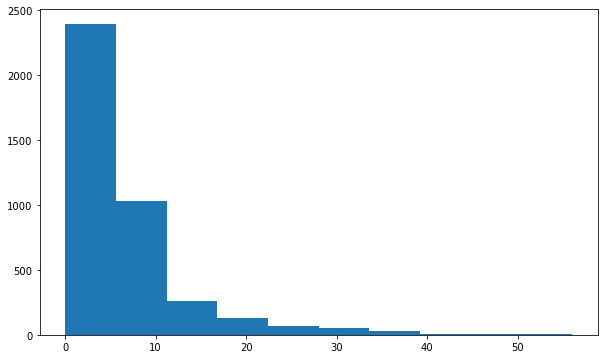

In [38]:
plt.figure(figsize=(10,6))
plt.hist(df_final["days_on_market"])
plt.show()

In [39]:
# get features and target
X = df_final.drop("days_on_market", axis=1).values
y = df_final["days_on_market"].values

In [40]:
df_final.columns

Index(['county_Collin', 'county_Dallas', 'county_Ellis', 'county_Hunt',
       'county_Kaufman', 'county_Rockwall', 'county_Tarrant',
       'hoa_type_Mandatory', 'hoa_type_None', 'hoa_type_Voluntary', 'city_le',
       'days_on_market', 'sqft', 'beds_total', 'bath_total'],
      dtype='object')

In [41]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.7498745609633718
0.2501254390366282


In [42]:
# this function takes in a model algorithm and the training data and prints graphs and metrics
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, test_preds)
    plt.title("Actual vs Predicted Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot(y_test, y_test)
    plt.show()
    
    # Plot Residuals
    plt.figure(figsize=(10,6))
    plt.scatter(test_preds, test_preds - y_test)
    plt.hlines(y=0, xmin=test_preds.min(), xmax=test_preds.max(), color="r")
    plt.title("Residuals")
    plt.xlabel("Prediction")
    plt.ylabel("Error")
    plt.show()

    return(model)

TRAINING SET
root mean squared error (RMSE): 6.736644291823283
R-squared (R2 ): 0.005810551562032695
MAE 4.396751559362159

Testing SET
root mean squared error (RMSE): 6.488785343737243
R-squared (R2 ): -0.0006155968868848394
MAE 4.225443483763072


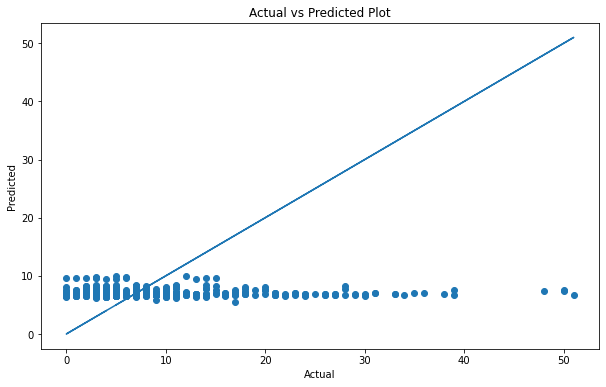

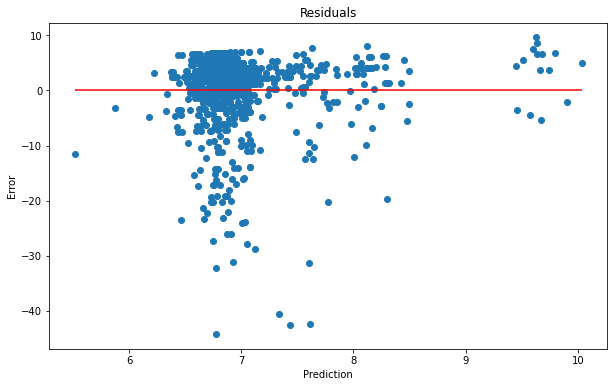

In [43]:
lr = LinearRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 6.736646291890876
R-squared (R2 ): 0.005809961224675919
MAE 4.396676808931662

Testing SET
root mean squared error (RMSE): 6.488462398582468
R-squared (R2 ): -0.0005159986106915149
MAE 4.22547868503743


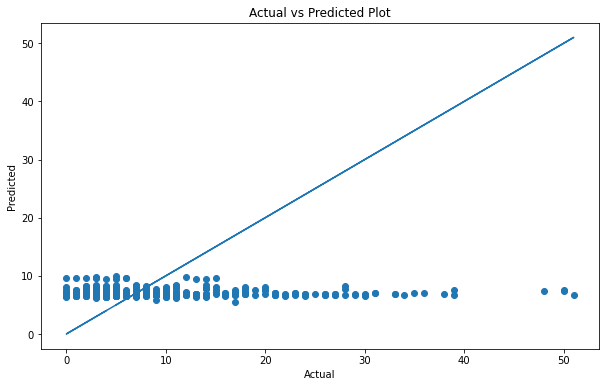

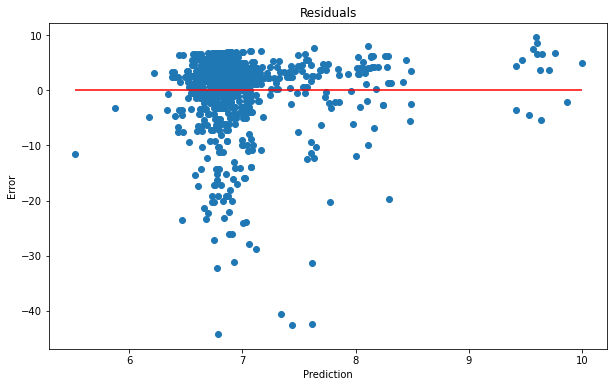

In [44]:
ridge = Ridge()
ridge = evaluateModel(ridge, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 6.75549095110738
R-squared (R2 ): 0.00024001560338415828
MAE 4.390981337682059

Testing SET
root mean squared error (RMSE): 6.491348395466236
R-squared (R2 ): -0.0014062336271849496
MAE 4.2367392148674465


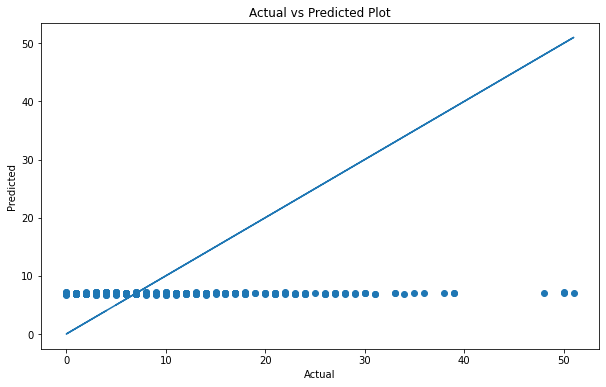

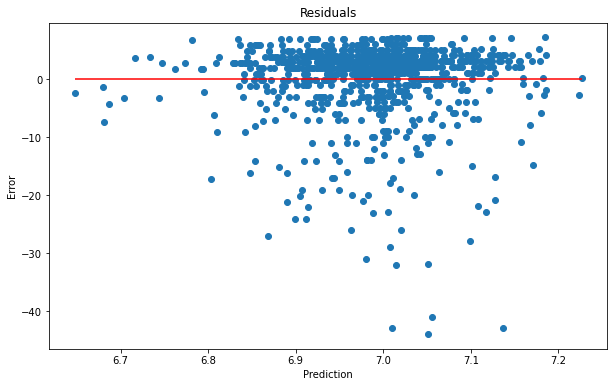

In [45]:
lasso = Lasso()
lasso = evaluateModel(lasso, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 6.755425951446502
R-squared (R2 ): 0.00025925439677032536
MAE 4.391638081303085

Testing SET
root mean squared error (RMSE): 6.490976509542134
R-squared (R2 ): -0.0012914968445154607
MAE 4.237220545634476


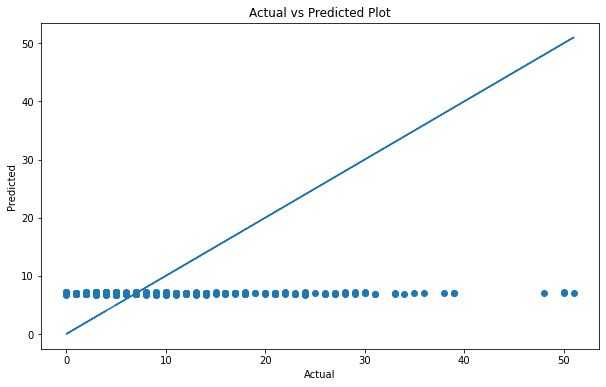

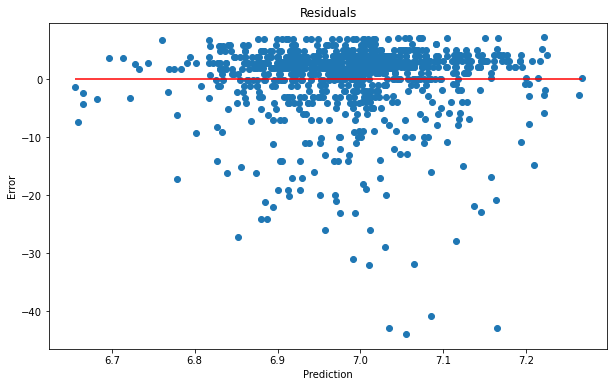

In [46]:
en = ElasticNet()
en = evaluateModel(en, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 0.6591101800975286
R-squared (R2 ): 0.9904830463149806
MAE 0.07594513215122115

Testing SET
root mean squared error (RMSE): 9.577299933805257
R-squared (R2 ): -1.1798501016345204
MAE 6.062186559679037


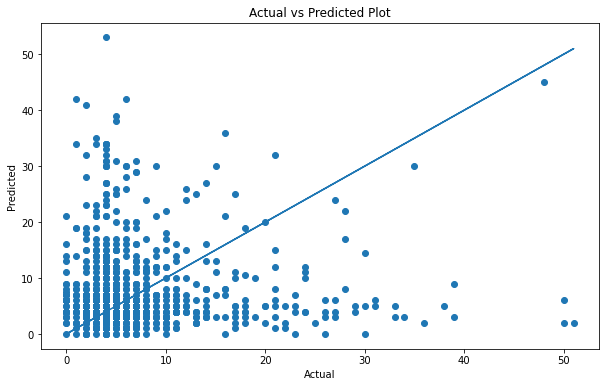

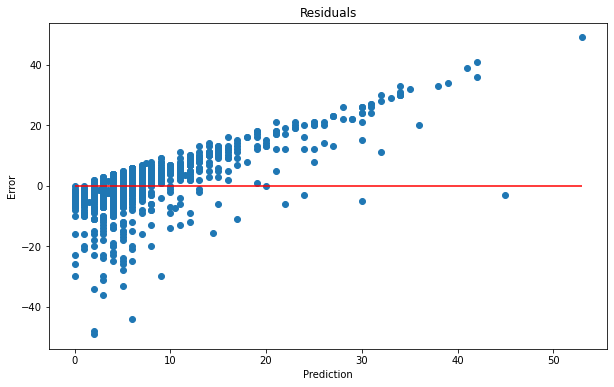

In [47]:
dt = DecisionTreeRegressor()
dt = evaluateModel(dt, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 2.795150483908291
R-squared (R2 ): 0.8288439302562862
MAE 1.8453351017221877

Testing SET
root mean squared error (RMSE): 7.01961602968595
R-squared (R2 ): -0.17102769747679192
MAE 4.670177667924409


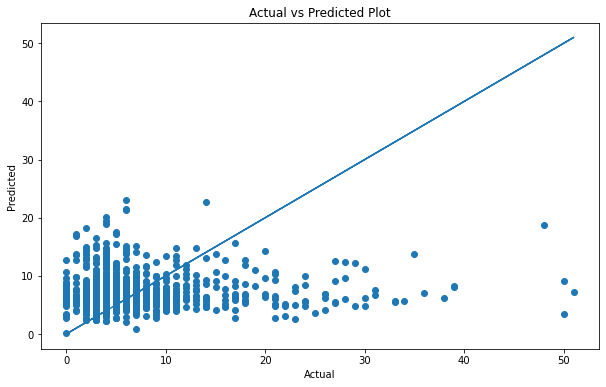

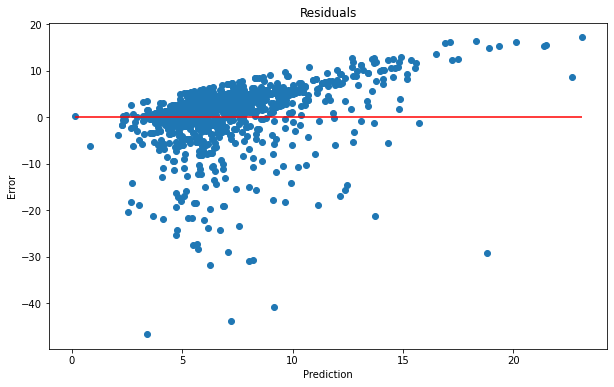

In [48]:
rf = RandomForestRegressor()
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 0.6591101800975286
R-squared (R2 ): 0.9904830463149806
MAE 0.07594513215122115

Testing SET
root mean squared error (RMSE): 7.508395353025305
R-squared (R2 ): -0.33978378592712155
MAE 4.985441323971917


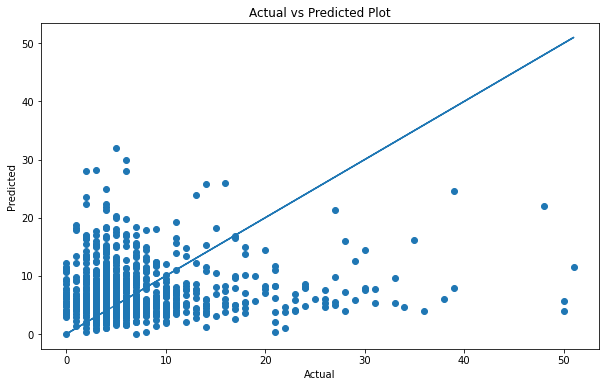

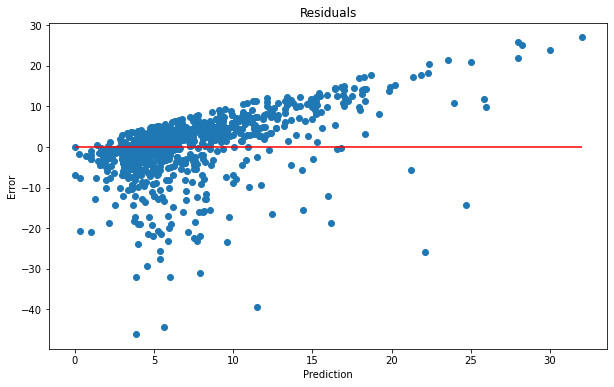

In [49]:
et = ExtraTreesRegressor(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test) 

In [50]:
test1= df_final.drop("days_on_market", axis=1)
list(zip(test1.columns, et.feature_importances_))

[('county_Collin', 0.012869942713330043),
 ('county_Dallas', 0.012070017032073605),
 ('county_Ellis', 0.001445392606761026),
 ('county_Hunt', 0.0029148249396060352),
 ('county_Kaufman', 0.0013954939056964497),
 ('county_Rockwall', 0.0038759238505408525),
 ('county_Tarrant', 0.012226232966482762),
 ('hoa_type_Mandatory', 0.019282428990595395),
 ('hoa_type_None', 0.01588740553862859),
 ('hoa_type_Voluntary', 0.0029223510689887953),
 ('city_le', 0.19604919479385943),
 ('sqft', 0.5968859173340163),
 ('beds_total', 0.05731366474319303),
 ('bath_total', 0.06486120951622769)]

TRAINING SET
root mean squared error (RMSE): 11.902726895020225
R-squared (R2 ): -2.1036651145341363
MAE 11.062754745020525

Testing SET
root mean squared error (RMSE): 12.14416916846035
R-squared (R2 ): -2.504903538082294
MAE 11.303550510484579


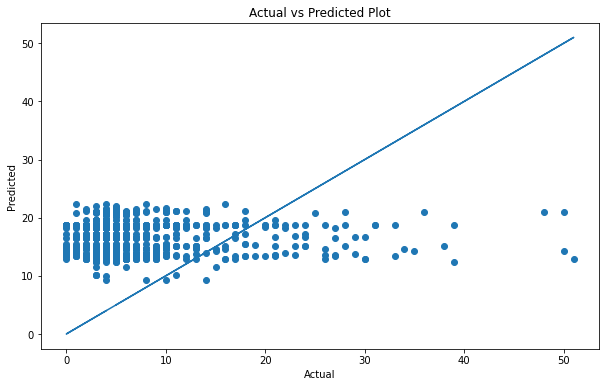

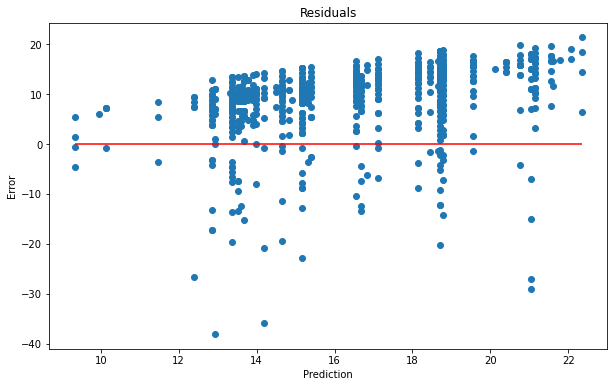

In [51]:
ada = AdaBoostRegressor(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 6.184873428364125
R-squared (R2 ): 0.16200090511136955
MAE 4.101247906945854

Testing SET
root mean squared error (RMSE): 6.566571826393745
R-squared (R2 ): -0.024749821205272138
MAE 4.3168434104428455


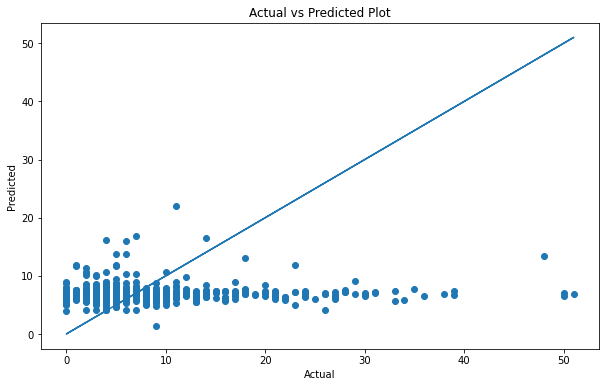

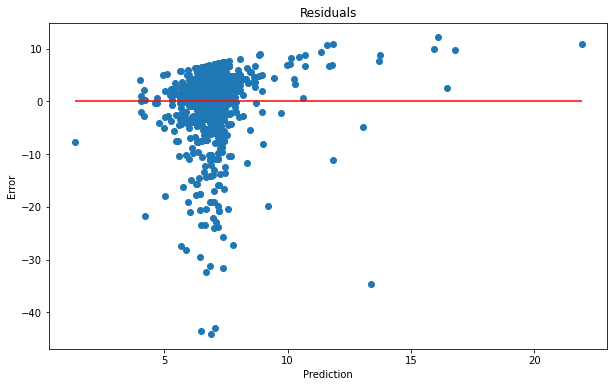

In [52]:
gb = GradientBoostingRegressor(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

TRAINING SET
root mean squared error (RMSE): 3.7109968390829526
R-squared (R2 ): 0.6983084920841454
MAE 2.4818825294896487

Testing SET
root mean squared error (RMSE): 7.068197174622918
R-squared (R2 ): -0.18729261193432212
MAE 4.62839405240123


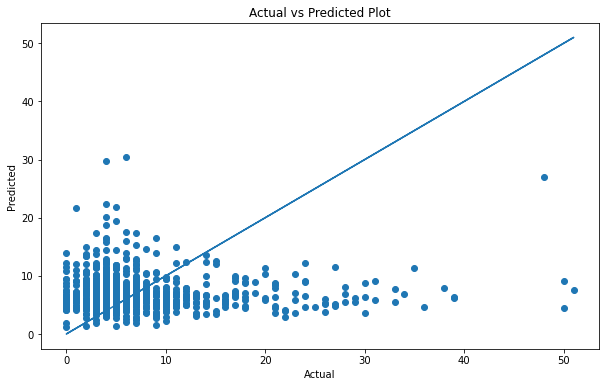

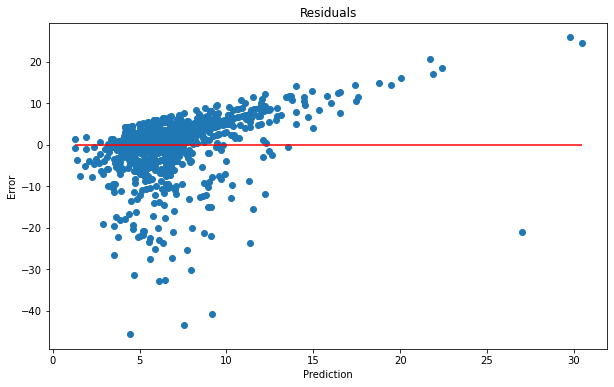

In [53]:
xgb = XGBRegressor(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

In [54]:
df_final.corr()

,county_Collin,county_Dallas,county_Ellis,county_Hunt,county_Kaufman,county_Rockwall,county_Tarrant,hoa_type_Mandatory,hoa_type_None,hoa_type_Voluntary,city_le,days_on_market,sqft,beds_total,bath_total
county_Collin,1.000000,-0.342028,-0.111110,-0.071418,-0.112875,-0.093161,-0.402046,0.282011,-0.279619,-0.003512,0.250854,-0.004682,0.197142,0.166097,0.182206
county_Dallas,-0.342028,1.000000,-0.131247,-0.084362,-0.133332,-0.110046,-0.474912,-0.328035,0.312886,0.044928,-0.188223,-0.013156,-0.074288,-0.082964,-0.035202
county_Ellis,-0.111110,-0.131247,1.000000,-0.027406,-0.043314,-0.035749,-0.154279,-0.006230,0.013324,-0.023523,0.236507,0.029880,-0.005392,0.014381,-0.018107
county_Hunt,-0.071418,-0.084362,-0.027406,1.000000,-0.027841,-0.022978,-0.099166,-0.020320,0.018719,0.004971,0.039300,0.039099,-0.064712,-0.051194,-0.053497
county_Kaufman,-0.112875,-0.133332,-0.043314,-0.027841,1.000000,-0.036317,-0.156729,0.116684,-0.106317,-0.032422,-0.007191,0.034744,-0.059462,-0.010459,-0.059794
county_Rockwall,-0.093161,-0.110046,-0.035749,-0.022978,-0.036317,1.000000,-0.129356,0.102751,-0.112127,0.032563,0.152635,0.028644,0.056635,0.068483,0.054599
county_Tarrant,-0.402046,-0.474912,-0.154279,-0.099166,-0.156729,-0.129356,1.000000,-0.012517,0.021187,-0.028830,-0.199462,-0.031082,-0.076531,-0.077854,-0.097382
hoa_type_Mandatory,0.282011,-0.328035,-0.006230,-0.020320,0.116684,0.102751,-0.012517,1.000000,-0.953949,-0.136527,0.105702,-0.004862,0.363228,0.308197,0.316042
hoa_type_None,-0.279619,0.312886,0.013324,0.018719,-0.106317,-0.112127,0.021187,-0.953949,1.000000,-0.166919,-0.105076,0.007040,-0.385154,-0.320835,-0.333897
hoa_type_Voluntary,-0.003512,0.044928,-0.023523,0.004971,-0.032422,0.032563,-0.028830,-0.136527,-0.166919,1.000000,-0.000425,-0.007267,0.078061,0.046531,0.063881


In [55]:
df_final.loc[df_final.days_on_market<=14].corr()

,county_Collin,county_Dallas,county_Ellis,county_Hunt,county_Kaufman,county_Rockwall,county_Tarrant,hoa_type_Mandatory,hoa_type_None,hoa_type_Voluntary,city_le,days_on_market,sqft,beds_total,bath_total
county_Collin,1.000000,-0.344986,-0.108746,-0.069440,-0.111563,-0.091250,-0.409621,0.290311,-0.288815,-0.000658,0.264933,0.022066,0.194634,0.163492,0.180041
county_Dallas,-0.344986,1.000000,-0.127043,-0.081124,-0.130334,-0.106604,-0.478543,-0.330501,0.311998,0.056325,-0.197728,-0.016051,-0.061832,-0.080350,-0.023168
county_Ellis,-0.108746,-0.127043,1.000000,-0.025572,-0.041084,-0.033603,-0.150845,-0.000754,0.007201,-0.021337,0.223126,0.019534,-0.011045,0.013476,-0.025989
county_Hunt,-0.069440,-0.081124,-0.025572,1.000000,-0.026234,-0.021458,-0.096323,-0.011368,0.012862,-0.005109,0.042568,0.012569,-0.061903,-0.043399,-0.047853
county_Kaufman,-0.111563,-0.130334,-0.041084,-0.026234,1.000000,-0.034474,-0.154753,0.112314,-0.102233,-0.031687,-0.003149,0.005384,-0.062882,-0.005336,-0.060226
county_Rockwall,-0.091250,-0.106604,-0.033603,-0.021458,-0.034474,1.000000,-0.126577,0.096919,-0.102256,0.019086,0.141349,-0.021189,0.044429,0.063269,0.047968
county_Tarrant,-0.409621,-0.478543,-0.150845,-0.096323,-0.154753,-0.126577,1.000000,-0.017948,0.028771,-0.036069,-0.192284,-0.010263,-0.080380,-0.080410,-0.104024
hoa_type_Mandatory,0.290311,-0.330501,-0.000754,-0.011368,0.112314,0.096919,-0.017948,1.000000,-0.954113,-0.137014,0.109661,0.001136,0.360758,0.314455,0.314737
hoa_type_None,-0.288815,0.311998,0.007201,0.012862,-0.102233,-0.102256,0.028771,-0.954113,1.000000,-0.165894,-0.106883,-0.000204,-0.383638,-0.327228,-0.332798
hoa_type_Voluntary,-0.000658,0.056325,-0.021337,-0.005109,-0.031687,0.019086,-0.036069,-0.137014,-0.165894,1.000000,-0.007569,-0.003067,0.081019,0.046900,0.064398


In [56]:
df_final.describe()

,county_Collin,county_Dallas,county_Ellis,county_Hunt,county_Kaufman,county_Rockwall,county_Tarrant,hoa_type_Mandatory,hoa_type_None,hoa_type_Voluntary,city_le,days_on_market,sqft,beds_total,bath_total
count,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000
mean,0.224536,0.287757,0.040893,0.017311,0.042148,0.029102,0.358254,0.438284,0.538384,0.023332,44.843954,6.927496,2289.957100,3.549172,2.645008
std,0.417329,0.452774,0.198067,0.130442,0.200951,0.168113,0.479547,0.496239,0.498587,0.150974,29.310029,6.691631,947.139249,0.747537,0.989111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,621.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3.000000,1630.000000,3.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,35.000000,5.000000,2063.000000,3.000000,2.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,67.750000,8.000000,2774.000000,4.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,112.000000,56.000000,9327.000000,7.000000,9.000000


In [57]:
df_final["less_than_week"] = df_final["days_on_market"] < 5
df_final.corr()

/var/folders/5f/xys93hxj6gb7ymsc8c000z5h0000gn/T/ipykernel_1596/2254549552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["less_than_week"] = df_final["days_on_market"] < 5


,county_Collin,county_Dallas,county_Ellis,county_Hunt,county_Kaufman,county_Rockwall,county_Tarrant,hoa_type_Mandatory,hoa_type_None,hoa_type_Voluntary,city_le,days_on_market,sqft,beds_total,bath_total,less_than_week
county_Collin,1.000000,-0.342028,-0.111110,-0.071418,-0.112875,-0.093161,-0.402046,0.282011,-0.279619,-0.003512,0.250854,-0.004682,0.197142,0.166097,0.182206,0.013965
county_Dallas,-0.342028,1.000000,-0.131247,-0.084362,-0.133332,-0.110046,-0.474912,-0.328035,0.312886,0.044928,-0.188223,-0.013156,-0.074288,-0.082964,-0.035202,-0.006042
county_Ellis,-0.111110,-0.131247,1.000000,-0.027406,-0.043314,-0.035749,-0.154279,-0.006230,0.013324,-0.023523,0.236507,0.029880,-0.005392,0.014381,-0.018107,-0.026411
county_Hunt,-0.071418,-0.084362,-0.027406,1.000000,-0.027841,-0.022978,-0.099166,-0.020320,0.018719,0.004971,0.039300,0.039099,-0.064712,-0.051194,-0.053497,-0.025055
county_Kaufman,-0.112875,-0.133332,-0.043314,-0.027841,1.000000,-0.036317,-0.156729,0.116684,-0.106317,-0.032422,-0.007191,0.034744,-0.059462,-0.010459,-0.059794,-0.021725
county_Rockwall,-0.093161,-0.110046,-0.035749,-0.022978,-0.036317,1.000000,-0.129356,0.102751,-0.112127,0.032563,0.152635,0.028644,0.056635,0.068483,0.054599,-0.002806
county_Tarrant,-0.402046,-0.474912,-0.154279,-0.099166,-0.156729,-0.129356,1.000000,-0.012517,0.021187,-0.028830,-0.199462,-0.031082,-0.076531,-0.077854,-0.097382,0.021362
hoa_type_Mandatory,0.282011,-0.328035,-0.006230,-0.020320,0.116684,0.102751,-0.012517,1.000000,-0.953949,-0.136527,0.105702,-0.004862,0.363228,0.308197,0.316042,0.031227
hoa_type_None,-0.279619,0.312886,0.013324,0.018719,-0.106317,-0.112127,0.021187,-0.953949,1.000000,-0.166919,-0.105076,0.007040,-0.385154,-0.320835,-0.333897,-0.028614
hoa_type_Voluntary,-0.003512,0.044928,-0.023523,0.004971,-0.032422,0.032563,-0.028830,-0.136527,-0.166919,1.000000,-0.000425,-0.007267,0.078061,0.046531,0.063881,-0.008142


In [58]:
df_final.less_than_week.value_counts()

False    2167
True     1819
Name: less_than_week, dtype: int64

In [59]:
#Classifier models for less than week

In [60]:
X = df_final.drop(["days_on_market", "less_than_week"], axis=1).values
y = df_final["less_than_week"].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25, stratify=y)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.7498745609633718
0.2501254390366282


In [62]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

/Users/serendipitousfun/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TRAINING SET
              precision    recall  f1-score   support

       False       0.56      0.84      0.67      1625
        True       0.53      0.21      0.30      1364

    accuracy                           0.55      2989
   macro avg       0.55      0.53      0.49      2989
weighted avg       0.55      0.55      0.50      2989

[[1366  259]
 [1072  292]]

Testing SET
              precision    recall  f1-score   support

       False       0.53      0.78      0.63       542
        True       0.41      0.19      0.26       455

    accuracy                           0.51       997
   macro avg       0.47      0.48      0.45       997
weighted avg       0.48      0.51      0.46       997

[[422 120]
 [370  85]]


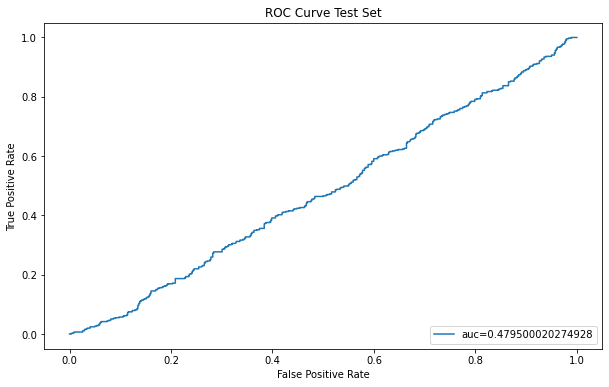

In [63]:
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

       False       0.70      0.75      0.72      1625
        True       0.67      0.61      0.64      1364

    accuracy                           0.69      2989
   macro avg       0.68      0.68      0.68      2989
weighted avg       0.68      0.69      0.68      2989

[[1213  412]
 [ 527  837]]

Testing SET
              precision    recall  f1-score   support

       False       0.54      0.56      0.55       542
        True       0.46      0.45      0.45       455

    accuracy                           0.51       997
   macro avg       0.50      0.50      0.50       997
weighted avg       0.50      0.51      0.50       997

[[301 241]
 [252 203]]


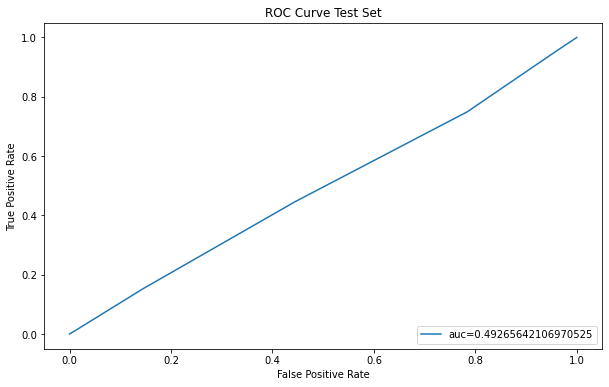

In [64]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = evaluateModel(knn, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      1625
        True       0.99      0.99      0.99      1364

    accuracy                           0.99      2989
   macro avg       0.99      0.99      0.99      2989
weighted avg       0.99      0.99      0.99      2989

[[1616    9]
 [  10 1354]]

Testing SET
              precision    recall  f1-score   support

       False       0.54      0.54      0.54       542
        True       0.45      0.46      0.46       455

    accuracy                           0.50       997
   macro avg       0.50      0.50      0.50       997
weighted avg       0.50      0.50      0.50       997

[[290 252]
 [246 209]]


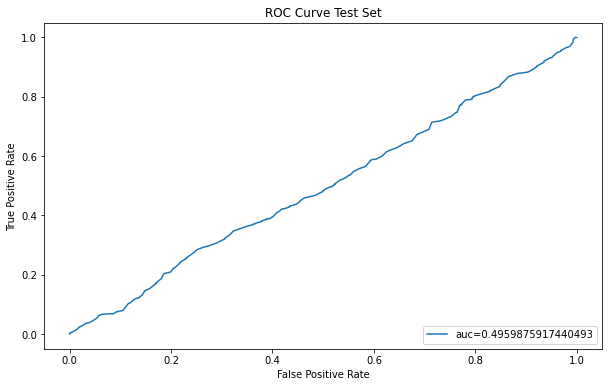

In [65]:
rf = RandomForestClassifier(random_state=42)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      1625
        True       1.00      0.99      0.99      1364

    accuracy                           0.99      2989
   macro avg       0.99      0.99      0.99      2989
weighted avg       0.99      0.99      0.99      2989

[[1625    0]
 [  19 1345]]

Testing SET
              precision    recall  f1-score   support

       False       0.54      0.52      0.53       542
        True       0.46      0.48      0.47       455

    accuracy                           0.50       997
   macro avg       0.50      0.50      0.50       997
weighted avg       0.50      0.50      0.50       997

[[282 260]
 [237 218]]


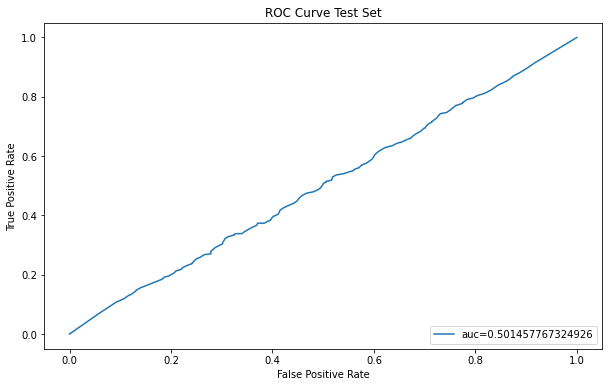

In [66]:
et = ExtraTreesClassifier(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

       False       0.58      0.82      0.68      1625
        True       0.57      0.29      0.39      1364

    accuracy                           0.58      2989
   macro avg       0.58      0.56      0.53      2989
weighted avg       0.58      0.58      0.55      2989

[[1325  300]
 [ 962  402]]

Testing SET
              precision    recall  f1-score   support

       False       0.54      0.73      0.62       542
        True       0.45      0.26      0.33       455

    accuracy                           0.52       997
   macro avg       0.50      0.50      0.48       997
weighted avg       0.50      0.52      0.49       997

[[398 144]
 [335 120]]


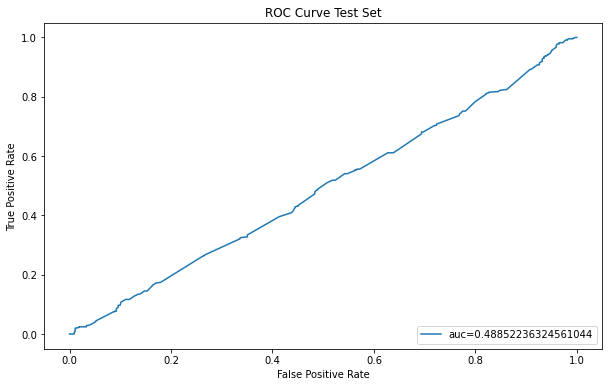

In [67]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

       False       0.63      0.87      0.73      1625
        True       0.71      0.38      0.50      1364

    accuracy                           0.65      2989
   macro avg       0.67      0.62      0.61      2989
weighted avg       0.66      0.65      0.62      2989

[[1409  216]
 [ 843  521]]

Testing SET
              precision    recall  f1-score   support

       False       0.54      0.72      0.62       542
        True       0.45      0.27      0.34       455

    accuracy                           0.51       997
   macro avg       0.49      0.49      0.48       997
weighted avg       0.50      0.51      0.49       997

[[390 152]
 [332 123]]


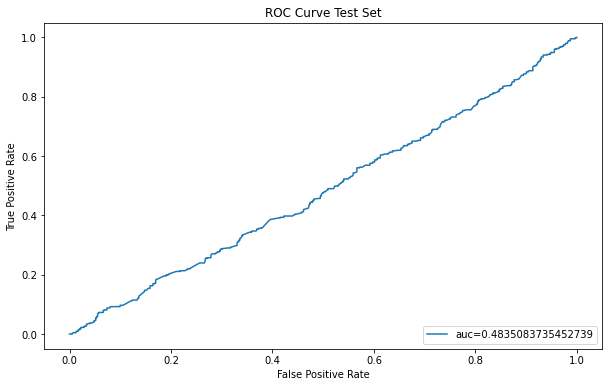

In [68]:
gb = GradientBoostingClassifier(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1625
        True       0.87      0.79      0.83      1364

    accuracy                           0.85      2989
   macro avg       0.85      0.84      0.85      2989
weighted avg       0.85      0.85      0.85      2989

[[1463  162]
 [ 288 1076]]

Testing SET
              precision    recall  f1-score   support

       False       0.55      0.57      0.56       542
        True       0.46      0.44      0.45       455

    accuracy                           0.51       997
   macro avg       0.51      0.51      0.51       997
weighted avg       0.51      0.51      0.51       997

[[307 235]
 [253 202]]


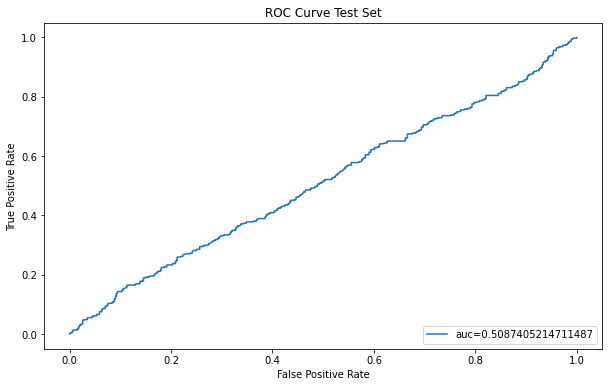

In [69]:
xgb = XGBClassifier(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

Model Selection

In [70]:
#No model fits this data for the days on market feature. It does not correlate to the data provided. 

SyntaxError: invalid syntax (454446680.py, line 1)